# Plot loanword integration over time
We've collected the raw counts for integrated and light verb loanword use in Twitter over 5-year samples.

Let's plot those counts! Give me pictures of Spiderman!

In [1]:
import re
import os
data_dir = '../../output/'
data_file_matcher = re.compile('LOANWORD=[a-z]+_twitter_counts.txt')
data_files = list(map(lambda x: os.path.join(data_dir, x), list(filter(lambda y: data_file_matcher.search(y) is not None, os.listdir(data_dir)))))
print(data_files)

['../../output/LOANWORD=google_twitter_counts.txt', '../../output/LOANWORD=tweet_twitter_counts.txt', '../../output/LOANWORD=delete_twitter_counts.txt', '../../output/LOANWORD=flirt_twitter_counts.txt', '../../output/LOANWORD=ghost_twitter_counts.txt', '../../output/LOANWORD=ban_twitter_counts.txt']


In [2]:
from datetime import datetime
import pandas as pd
count_data = []
date_matcher = re.compile('(?<=tweets-)[A-Za-z]+-\d{2}-\d{2}')
for data_file_i in data_files:
    data_i = pd.read_csv(data_file_i, sep=',', index_col=False, header=None)
    data_i.columns = ['loanword', 'integration_count', 'light_verb_count', 'file']
    data_i = data_i.assign(**{
        'date' : data_i.loc[:, 'file'].apply(lambda x: date_matcher.search(x).group(0))
    })
    data_i = data_i.assign(**{
        'date' : data_i.loc[:, 'date'].apply(lambda x: datetime.strptime(x, '%b-%d-%y'))
    })
    count_data.append(data_i)
count_data = pd.concat(count_data, axis=0)
display(count_data.head())

,loanword,integration_count,light_verb_count,file,date
0,google,15,3,tweets-Feb-15-14-00-00.gz,2014-02-15
1,google,6,3,tweets-Mar-15-14-00-00.gz,2014-03-15
2,google,3,1,tweets-Apr-15-14-00-00.gz,2014-04-15
3,google,8,0,tweets-May-15-14-00-00.gz,2014-05-15
4,google,4,1,tweets-Jun-15-14-00-00.gz,2014-06-15


/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


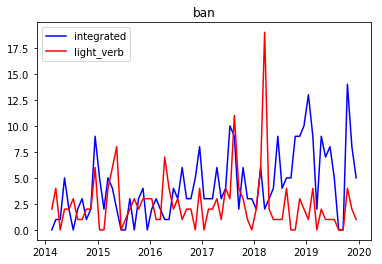

/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


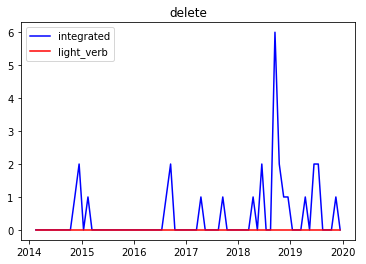

/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


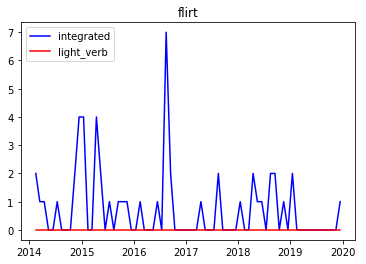

/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


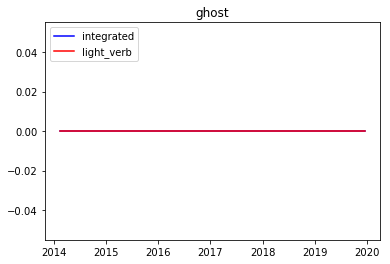

/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


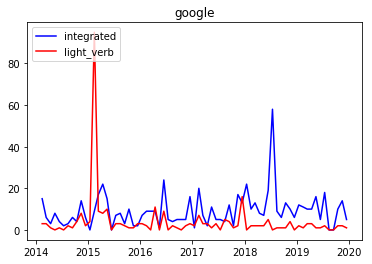

/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


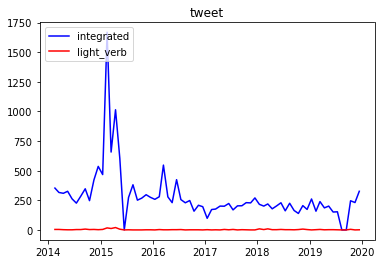

In [3]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
for loanword_i, data_i in count_data.groupby('loanword'):
    data_i.sort_values('date', inplace=True, ascending=True)
    ## raw counts
    dates_i = data_i.loc[:, 'date']
    integration_count_i = data_i.loc[:, 'integration_count']
    light_verb_count_i = data_i.loc[:, 'light_verb_count']
    # plot integration count, light verb count
    plt.plot(dates_i, integration_count_i, color='b', label='integrated')
    plt.plot(dates_i, light_verb_count_i, color='r', label='light_verb')
    plt.title(loanword_i)
    plt.legend(loc='upper left')
    plt.show()

/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


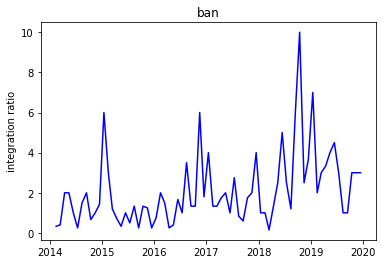

/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


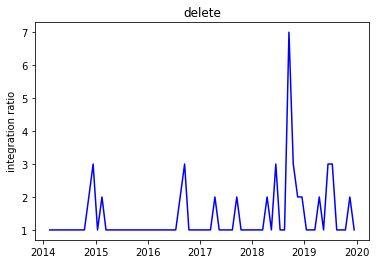

/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


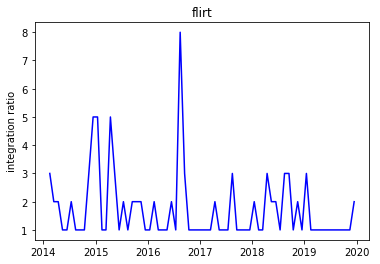

/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


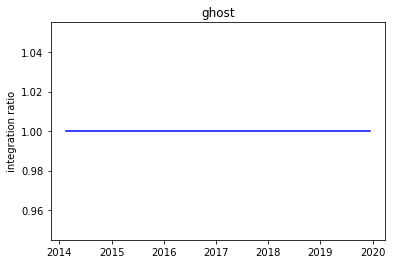

/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


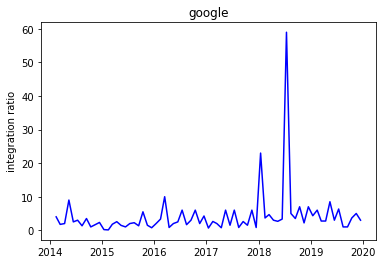

/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


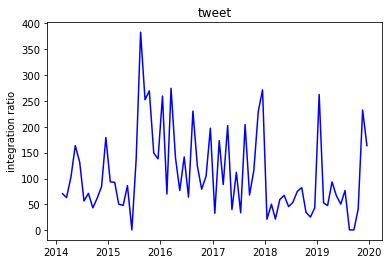

In [4]:
smooth_val = 1
for loanword_i, data_i in count_data.groupby('loanword'):
    data_i.sort_values('date', inplace=True, ascending=True)
    dates_i = data_i.loc[:, 'date']
    # smooth counts
    integration_count_i = data_i.loc[:, 'integration_count'] + smooth_val
    light_verb_count_i = data_i.loc[:, 'light_verb_count'] + smooth_val
    ## integration ratio
    integration_ratio_i = integration_count_i / light_verb_count_i
    if(not any(np.isnan(integration_ratio_i)) and not any(np.isinf(integration_ratio_i))):
        plt.plot(dates_i, integration_ratio_i, color='b')
        plt.title(loanword_i)
        plt.ylabel('integration ratio')
        plt.show()

This is pretty spiky!

Let's smooth the counts with a moving average.

### Moving average counts

In [5]:
window_size = 6
moving_average_count_data = []
count_cols = ['integration_count', 'light_verb_count']
for loanword_i, data_i in count_data.groupby('loanword'):
    moving_average_data_i = data_i.loc[:, count_cols].rolling(window=window_size, center=False, min_periods=1).mean()
    moving_average_data_i = moving_average_data_i.assign(**{
        'loanword' : loanword_i,
        'date' : data_i.loc[:, 'date']
    })
    moving_average_count_data.append(moving_average_data_i)
moving_average_count_data = pd.concat(moving_average_count_data, axis=0)
display(moving_average_count_data.head())

,integration_count,light_verb_count,loanword,date
0,0.000000,2.0,ban,2014-02-15
1,0.500000,3.0,ban,2014-03-15
2,0.666667,2.0,ban,2014-04-15
3,1.750000,2.0,ban,2014-05-15
4,1.800000,2.0,ban,2014-06-15


/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


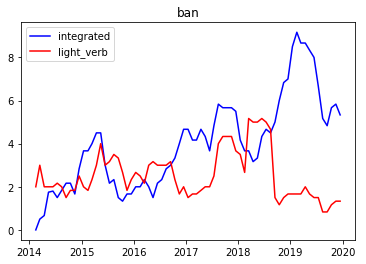

/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


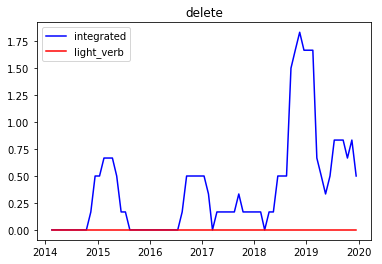

/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


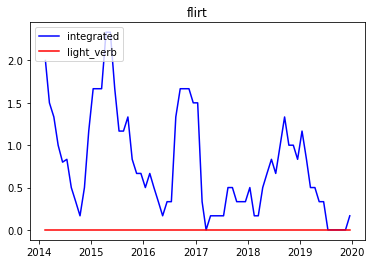

/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


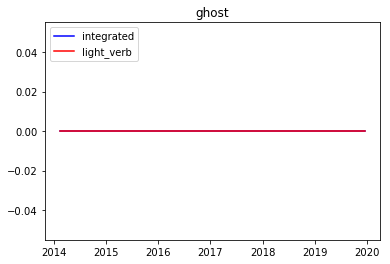

/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


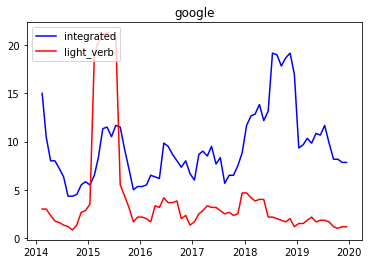

/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


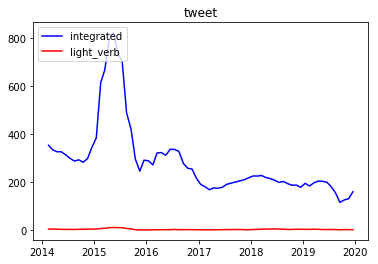

In [6]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
for loanword_i, data_i in moving_average_count_data.groupby('loanword'):
    data_i.sort_values('date', inplace=True, ascending=True)
    ## raw counts
    dates_i = data_i.loc[:, 'date']
    integration_count_i = data_i.loc[:, 'integration_count']
    light_verb_count_i = data_i.loc[:, 'light_verb_count']
    # plot integration count, light verb count
    plt.plot(dates_i, integration_count_i, color='b', label='integrated')
    plt.plot(dates_i, light_verb_count_i, color='r', label='light_verb')
    plt.title(loanword_i)
    plt.legend(loc='upper left')
    plt.show()

/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


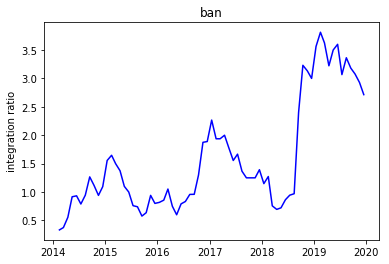

/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


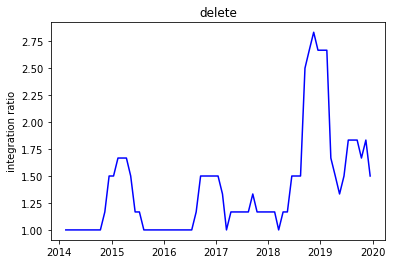

/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


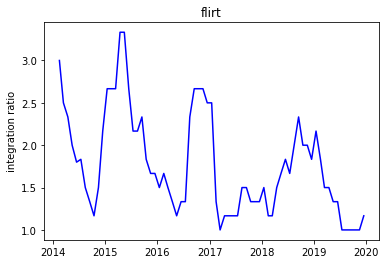

/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


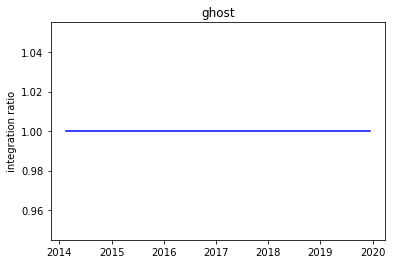

/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


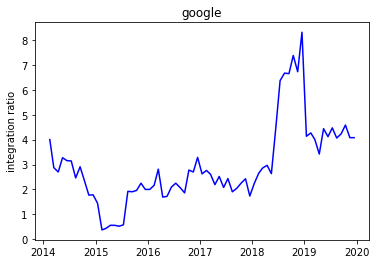

/hg190/istewart6/miniconda3/envs/loanword_adoption/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


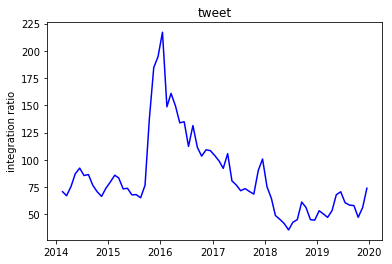

In [7]:
smooth_val = 1
for loanword_i, data_i in moving_average_count_data.groupby('loanword'):
    data_i.sort_values('date', inplace=True, ascending=True)
    dates_i = data_i.loc[:, 'date']
    # smooth counts
    integration_count_i = data_i.loc[:, 'integration_count'] + smooth_val
    light_verb_count_i = data_i.loc[:, 'light_verb_count'] + smooth_val
    ## integration ratio
    integration_ratio_i = integration_count_i / light_verb_count_i
    if(not any(np.isnan(integration_ratio_i)) and not any(np.isinf(integration_ratio_i))):
        plt.plot(dates_i, integration_ratio_i, color='b')
        plt.title(loanword_i)
        plt.ylabel('integration ratio')
        plt.show()

### Old code

### Sanity check: loanword existence
Some of the loanword that should be appearing in the ES indices are not. Where are they??

In [38]:
from data_helpers import execute_queries_all_instances
# txt_var = 'text'
# query = {
#             'query' : {
#                 'bool' : {
#                     'must' : [
#                         {
#                             'match' : {
#                                 txt_var : 'tweetear'
#                             }
#                         },
#                         {
#                             'match' : {
#                                 'lang' : 'es'
#                             }
#                         }
#                     ]
#                 }
#             }
#         }
query = {'query': {'bool': {'must': [{'match': {'text': 'touchearéis|toucheará|touchearán|touchear|transporteé|transporteamos|transporteaste|transporteasteis|transporteó|transportearon|transporteo|transporteamos|transporteas|transporteáis|transportea|transportean|transportearé|transportearemos|transportearás|transportearéis|transporteará|transportearán|transportear|traveleé|traveleamos|traveleaste|traveleasteis|traveleó|travelearon|traveleo|traveleamos|traveleas|traveleáis|travelea|travelean|travelearé|travelearemos|travelearás|travelearéis|traveleará|travelearán|travelear|troleé|troleamos|troleaste|troleasteis|troleó|trolearon|troleo|troleamos|troleas|troleáis|trolea|trolean|trolearé|trolearemos|trolearás|trolearéis|troleará|trolearán|trolear|tweeteé|tweeteamos|tweeteaste|tweeteasteis|tweeteó|tweetearon|tweeteo|tweeteamos|tweeteas|tweeteáis|tweetea|tweetean|tweetearé|tweetearemos|tweetearás|tweetearéis|tweeteará|tweetearán|tweetear|twerkeé|twerkeamos|twerkeaste|twerkeasteis|twerkeó|twerkearon|twerkeo|twerkeamos|twerkeas|twerkeáis|twerkea|twerkean|twerkearé|twerkearemos|twerkearás|twerkearéis|twerkeará|twerkearán|twerkear|upvoteé'}}, {'match': {'lang': 'es'}}]}}}
queries = [query]
es_year_month_pairs = [(2018, 7, 9)]
es_cluster_name = 'twitter_posts'
res = execute_queries_all_instances(queries, es_cluster_name=es_cluster_name, es_year_month_pairs=es_year_month_pairs)

starting index twitter_posts_2018_m_7_9
sleeping for 150 sec to wait for ES to initialize
opened ES instance twitter_posts_2018_m_7_9 with result
{"acknowledged":true}


In [40]:
res[0]

[{'text': '@taricoariel Ajjajajajaja tweeteamos lo mismo',
  'id': 1027413693712265216,
  'created_at': 'Thu Aug 09 04:38:07 +0000 2018',
  'user_id': 3071560792,
  'user_description': 'Parezco tincho pero soy aliado.Siempre facha nunca facho. LANA DEL REY 💚. Ayax y Prok, Los Piojos y Migos. De Boca y OKC⚡️ig: aguscurio',
  'user_screen_name': 'Agustin_curio',
  'user_location': 'Tincholandia (Lanus)',
  'lang': 'es',
  'lang_score': 97},
 {'text': 'RT @sfcsuso: La prensa lleva todo el verano troleando fichajes, para uno que troleamos nosotros tampoco pasa nada.',
  'id': 1034606329489502208,
  'created_at': 'Wed Aug 29 00:59:05 +0000 2018',
  'user_id': 2501635944,
  'user_screen_name': 'franlazarof4',
  'user_location': 'Montánchez / Cáceres ',
  'lang': 'es',
  'lang_score': 99},
 {'text': '@SolCn Dale con eso,ya cánsate nadie te trolea por lo que piensas,solo te trolean por lo que dices o también piensas.',
  'id': 1016450856798052357,
  'created_at': 'Mon Jul 09 22:35:43 +0000 201

In [43]:
from functools import reduce
loanword_integrated_data_file = '../../data/loanword_resources/wiktionary_twitter_reddit_loanword_verbs_integrated_verbs_query_phrases.tsv'
loanword_integrated_data = pd.read_csv(loanword_integrated_data_file, sep='\t', index_col=False)
integrated_verb_matcher = re.compile('(?<=^\()[\w\|]+(?=\)$)')
loanword_integrated_data = loanword_integrated_data.assign(**{
    'verb_list' : loanword_integrated_data.loc[:, 'verb'].apply(lambda x: integrated_verb_matcher.search(x).group(0).split('|'))
})
loanword_integrated_verbs = list(reduce(lambda x,y: x+y, loanword_integrated_data.loc[:, 'verb_list'].values))
loanword_integrated_verb_matcher = re.compile('|'.join(loanword_integrated_verbs))
integrated_verb_loanword_lookup = {v : k for k,vs in zip(loanword_integrated_data.loc[:, 'loanword'].values, loanword_integrated_data.loc[:, 'verb_list'].values) for v in vs}

In [48]:
from collect_loanword_authors import generate_chunk_txt_queries
max_chunk_size = 100
lang = 'es'
integrated_verb_queries = generate_chunk_txt_queries(loanword_integrated_verbs, txt_var=txt_var, lang=lang, max_chunk_size=max_chunk_size)

In [72]:
from importlib import reload
import data_helpers
reload(data_helpers)
from data_helpers import execute_queries_all_instances
es_year_month_pairs = [(2018, 7, 9)]
es_cluster_name = 'twitter_posts'
integrated_verb_query_results = execute_queries_all_instances(integrated_verb_queries, es_cluster_name=es_cluster_name, es_year_month_pairs=es_year_month_pairs, verbose=True)

starting index twitter_posts_2018_m_7_9
sleeping for 150 sec to wait for ES to initialize
opened ES instance twitter_posts_2018_m_7_9 with result
{"acknowledged":true}
processing query {'query': {'bool': {'must': [{'match': {'text': 'accesé|accesamos|accesaste|accesasteis|accesó|accesaron|acceso|accesamos|accesas|accesáis|accesa|accesan|accesaré|accesaremos|accesarás|accesaréis|accesará|accesarán|accesar|aimeé|aimeamos|aimeaste|aimeasteis|aimeó|aimearon|aimeo|aimeamos|aimeas|aimeáis|aimea|aimean|aimearé|aimearemos|aimearás|aimearéis|aimeará|aimearán|aimear|alerteé|alerteamos|alerteaste|alerteasteis|alerteó|alertearon|alerteo|alerteamos|alerteas|alerteáis|alertea|alertean|alertearé|alertearemos|alertearás|alertearéis|alerteará|alertearán|alertear|audité|auditamos|auditaste|auditasteis|auditó|auditaron|audito|auditamos|auditas|auditáis|audita|auditan|auditaré|auditaremos|auditarás|auditaréis|auditará|auditarán|auditar|baneé|baneamos|baneaste|baneasteis|baneó|banearon|baneo|baneamos|banea

collected 8056 results
processing query {'query': {'bool': {'must': [{'match': {'text': 'focalizaste|focalizasteis|focalizó|focalizaron|focalizo|focalizamos|focalizas|focalizáis|focaliza|focalizan|focalizaré|focalizaremos|focalizarás|focalizaréis|focalizará|focalizarán|focalizar|formateé|formateamos|formateaste|formateasteis|formateó|formatearon|formateo|formateamos|formateas|formateáis|formatea|formatean|formatearé|formatearemos|formatearás|formatearéis|formateará|formatearán|formatear|formeé|formeamos|formeaste|formeasteis|formeó|formearon|formeo|formeamos|formeas|formeáis|formea|formean|formearé|formearemos|formearás|formearéis|formeará|formearán|formear|friqueé|friqueamos|friqueaste|friqueasteis|friqueó|friquearon|friqueo|friqueamos|friqueas|friqueáis|friquea|friquean|friquearé|friquearemos|friquearás|friquearéis|friqueará|friquearán|friquear|frizé|frizamos|frizaste|frizasteis|frizó|frizaron|frizo|frizamos|frizas|frizáis|friza|frizan|frizaré|frizaremos|frizarás|frizaréis|frizará|fr

collected 1689 results
processing query {'query': {'bool': {'must': [{'match': {'text': 'protesteó|protestearon|protesteo|protesteamos|protesteas|protesteáis|protestea|protestean|protestearé|protestearemos|protestearás|protestearéis|protesteará|protestearán|protestear|puché|puchamos|puchaste|puchasteis|puchó|pucharon|pucho|puchamos|puchas|pucháis|pucha|puchan|pucharé|pucharemos|pucharás|pucharéis|puchará|pucharán|puchar|pumpeé|pumpeamos|pumpeaste|pumpeasteis|pumpeó|pumpearon|pumpeo|pumpeamos|pumpeas|pumpeáis|pumpea|pumpean|pumpearé|pumpearemos|pumpearás|pumpearéis|pumpeará|pumpearán|pumpear|quoteé|quoteamos|quoteaste|quoteasteis|quoteó|quotearon|quoteo|quoteamos|quoteas|quoteáis|quotea|quotean|quotearé|quotearemos|quotearás|quotearéis|quoteará|quotearán|quotear|rankeé|rankeamos|rankeaste|rankeasteis|rankeó|rankearon|rankeo|rankeamos|rankeas|rankeáis|rankea|rankean|rankearé|rankearemos|rankearás|rankearéis|rankeará|rankearán|rankear|ranteé|ranteamos|ranteaste|ranteasteis|ranteó|rantearo

In [78]:
len(integrated_verb_query_result)

24

In [79]:
txt_var = 'text'
author_var = 'user_screen_name'
integrated_verb_author_counts = []
for es_year_month_pair, integrated_verb_query_result in zip(es_year_month_pairs, integrated_verb_query_results):
    es_year_month_pair_str = '%d_m_%d_%d'%(es_year_month_pair[0], es_year_month_pair[1], es_year_month_pair[2])
    loanword_author_matches = []
    for res_list in integrated_verb_query_result:
        for res in res_list:
            # find matching loanword
            res_txt = res[txt_var]
            res_author = res[author_var]
            loanword_verb_match = loanword_integrated_verb_matcher.search(res_txt)
            if(loanword_verb_match is not None):
                loanword_verb = loanword_verb_match.group(0)
                loanword = integrated_verb_loanword_lookup[loanword_verb]
                loanword_author_matches.append([loanword, res_author, 1, es_year_month_pair])
    # combine, flatten
    loanword_author_match_data = pd.DataFrame(loanword_author_matches, columns=['loanword', 'author', 'count', 'time'])
    loanword_author_match_flat_data = loanword_author_match_data.groupby(['loanword', 'author', 'time']).apply(lambda x: x.loc[:, 'count'].sum()).reset_index().rename(columns={0 : 'count'})
    integrated_verb_author_counts.append(loanword_author_match_flat_data)
integrated_verb_author_counts = pd.concat(integrated_verb_author_counts, axis=0)

In [80]:
integrated_verb_author_counts.loc[:, 'loanword'].value_counts()

access     5606
flip       3571
connect    3274
stalk      2840
flash      2088
           ... 
freak         1
selfie        1
record        1
encrypt       1
aim           1
Name: loanword, Length: 87, dtype: int64